# Machine Learning and Statistics Assignment Page 1

## scipy-stats

***

10% A clear and concise overview of the scipy.stats Python library

***

20% An example hypothesis test using ANOVA. You should find a data set on which
it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are
met, and then perform and display the results of your ANOVA using scipy.stats

***

10% Appropriate plots and other visualisations to enhance your notebook for viewers.

***

## Anova

***

In [150]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

import matplotlib.pyplot as plt

In [ ]:
plot

In [103]:
data = pd.read_csv("balance-scale.csv")
data

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [123]:
dependent = data['Left-Weight']
dependent

0      1
1      1
2      1
3      1
4      1
      ..
620    5
621    5
622    5
623    5
624    5
Name: Left-Weight, Length: 625, dtype: int64

In [124]:
dependent.describe()

count    625.000000
mean       3.000000
std        1.415346
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Left-Weight, dtype: float64

In [125]:
independent = data['Class Name']
independent

0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: Class Name, Length: 625, dtype: object

In [127]:
independent.describe()

count     625
unique      3
top         R
freq      288
Name: Class Name, dtype: object

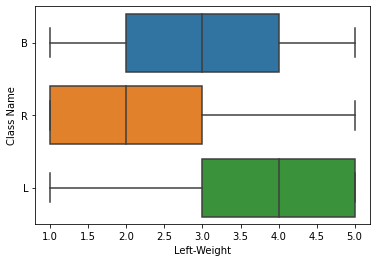

In [128]:
sns.boxplot(x=dependent, y=independent);

In [133]:
x = dependent

DataError: No numeric types to aggregate

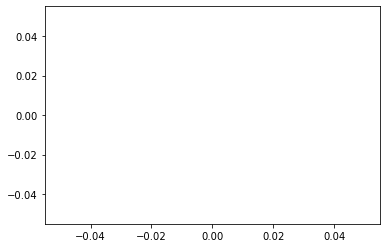

In [142]:
sns.lineplot(x=dependent, y=independent, data=data)

In [151]:
sns.__version__

'0.10.1'

## References

***

***